In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/predictive/predictive_maintenance.csv')
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [3]:
df[df['Failure Type']=='No Failure']

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[9652 rows x 10 columns]

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
#check for null values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [6]:
print(df['Failure Type'].unique(),df['Type'].unique(),df['Product ID'].unique())

['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure'] ['M' 'L' 'H'] ['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859']


In [7]:
df.drop(['UDI','Target'],axis=1).describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]  
count  10000.000000     10000.000000  
mean      39.986910       107.951000  
std        9.968934        63.654147  
min        3.800000         0.000000  
25%       33.200000        53.000000  
50%       40.100000       108.000000  
75%       46.800000       162.000000  
max       76.600000       253.000000

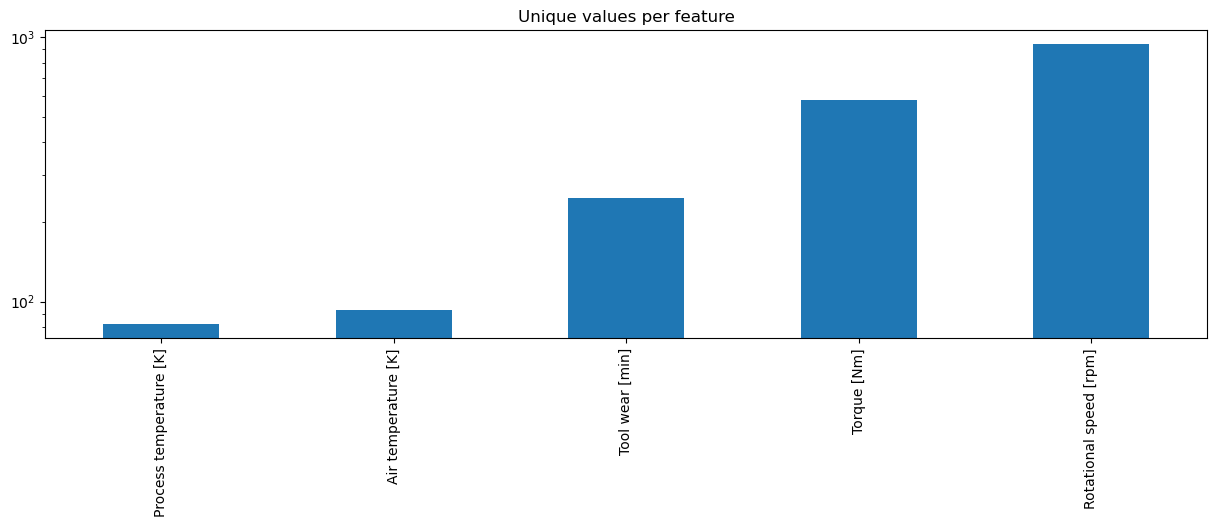

In [8]:
# For each numerical feature compute number of unique entries

unique_values = df.drop(['Target','UDI'], axis=1).select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

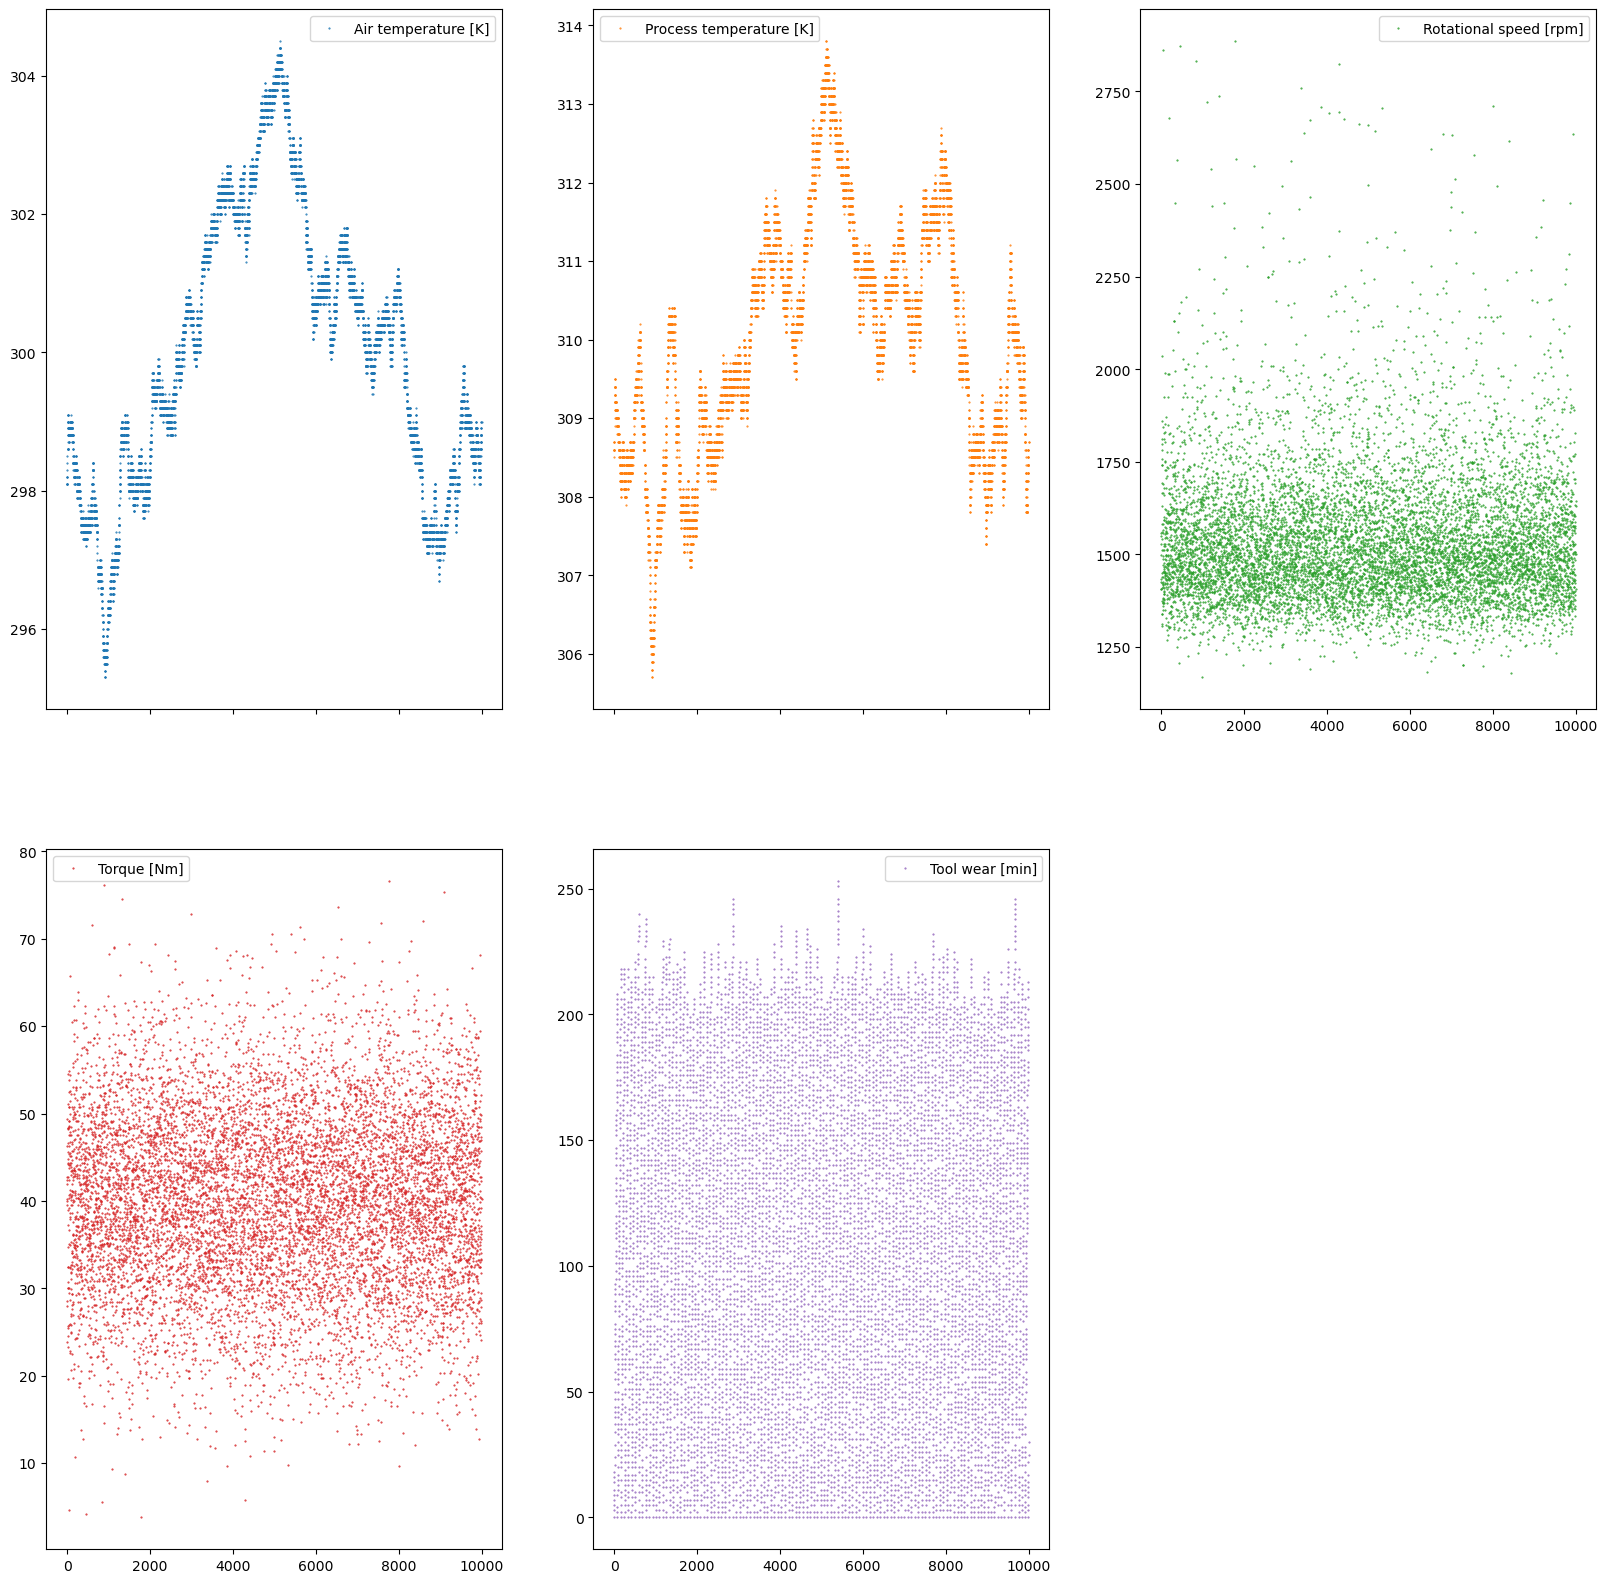

In [9]:
df.drop(['Target','UDI'],axis=1).plot(lw=0, marker=".",subplots=True, layout=(-1, 3),
          figsize=(20, 20), markersize=1);

In [10]:
df.describe(exclude=["number"])

Product ID   Type Failure Type
count       10000  10000        10000
unique      10000      3            6
top        M14860      L   No Failure
freq            1   6000         9652

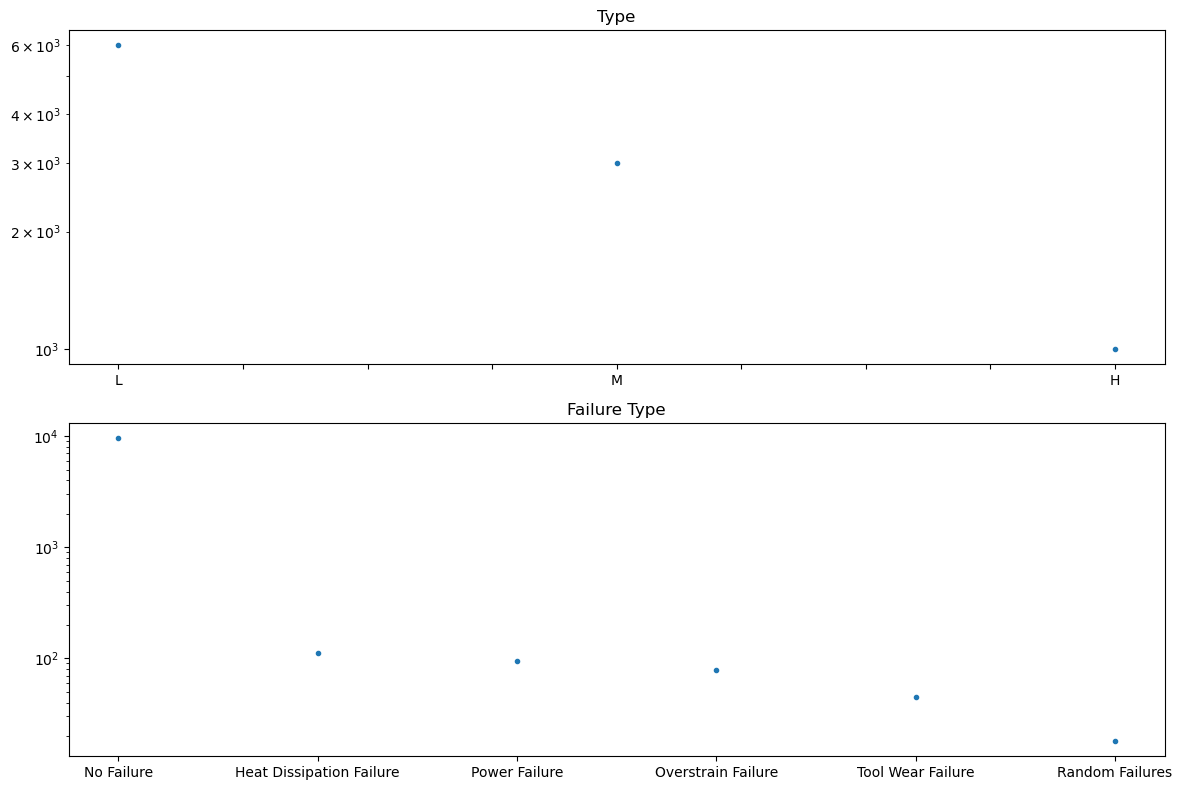

In [11]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df.drop(['UDI','Product ID'],axis=1).select_dtypes(exclude=["number"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(
 
        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

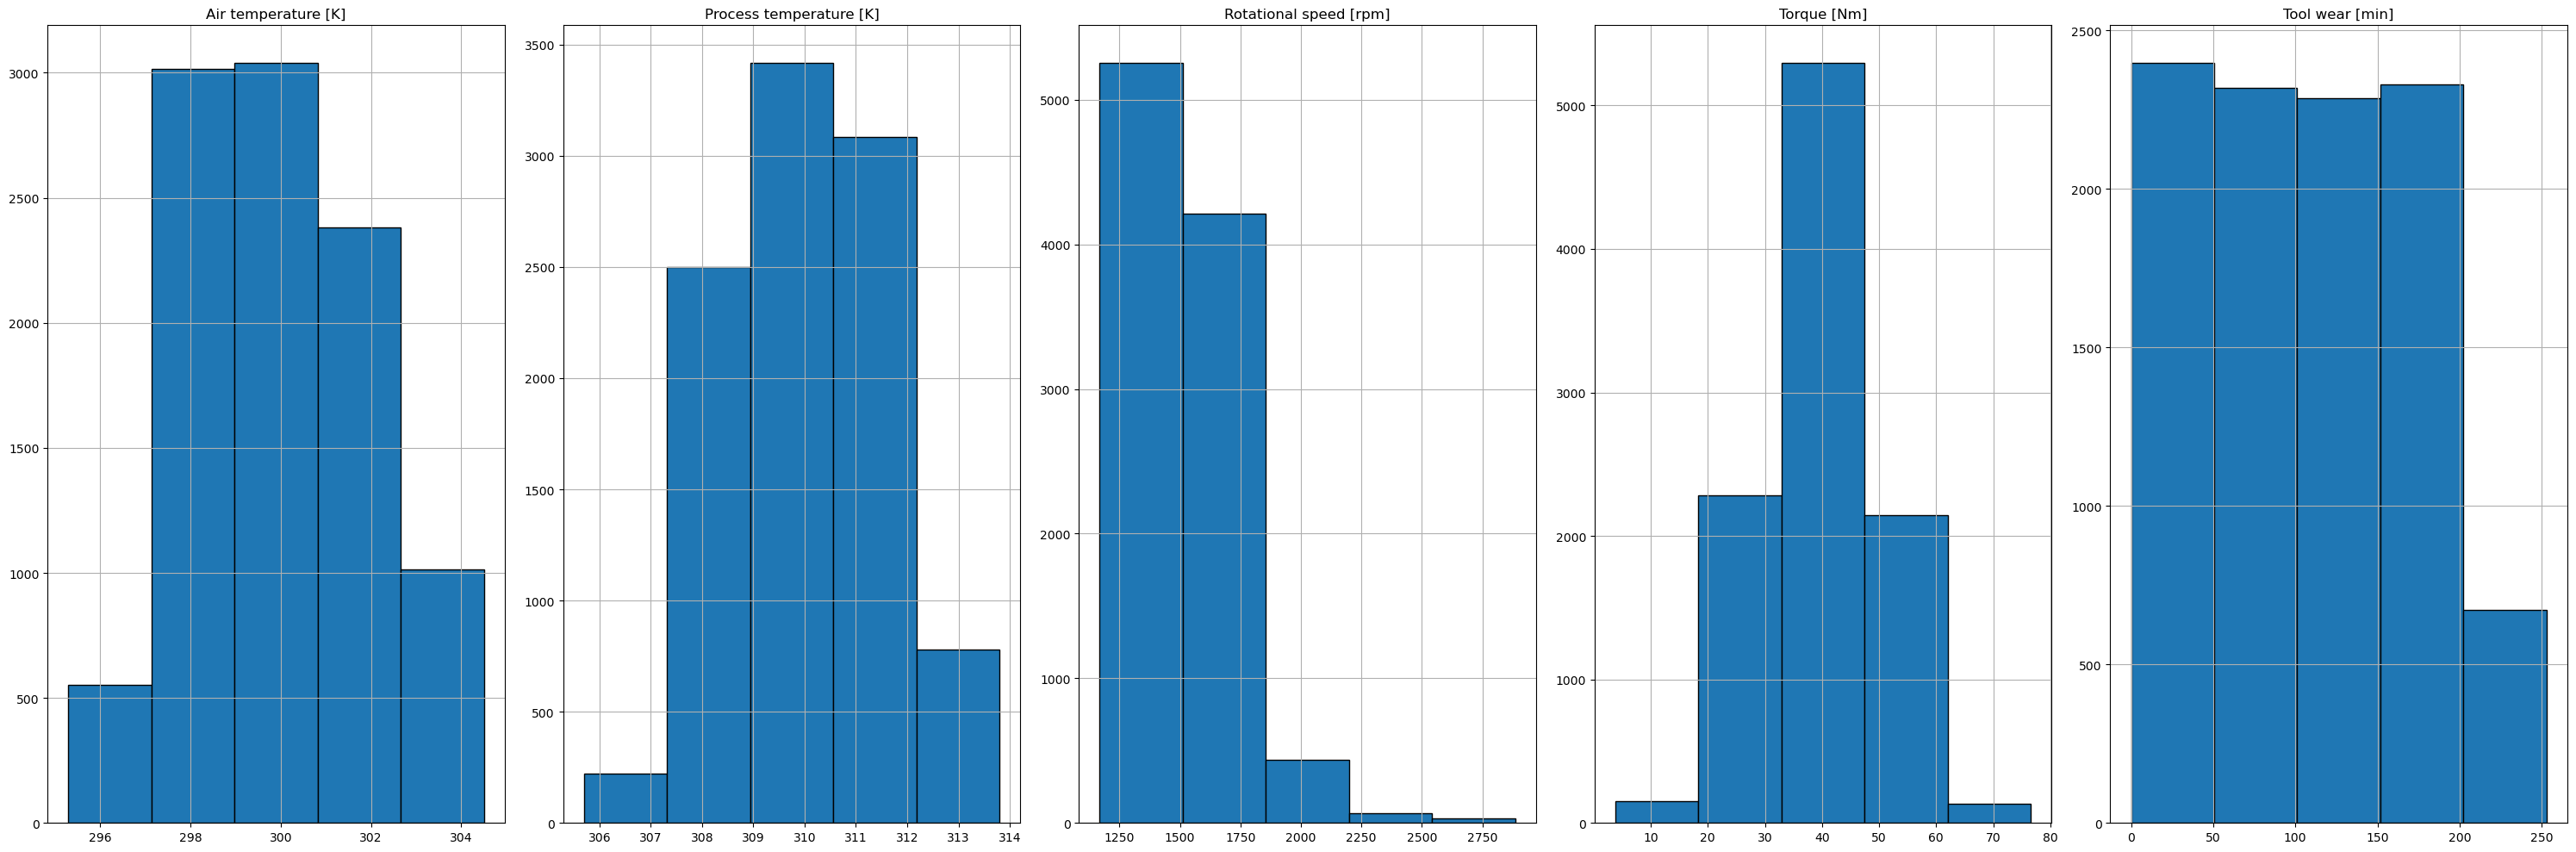

In [12]:
df1=df.drop(['UDI','Product ID','Target','Failure Type'],axis=1)
df1.hist(bins=5, figsize=(30, 10), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

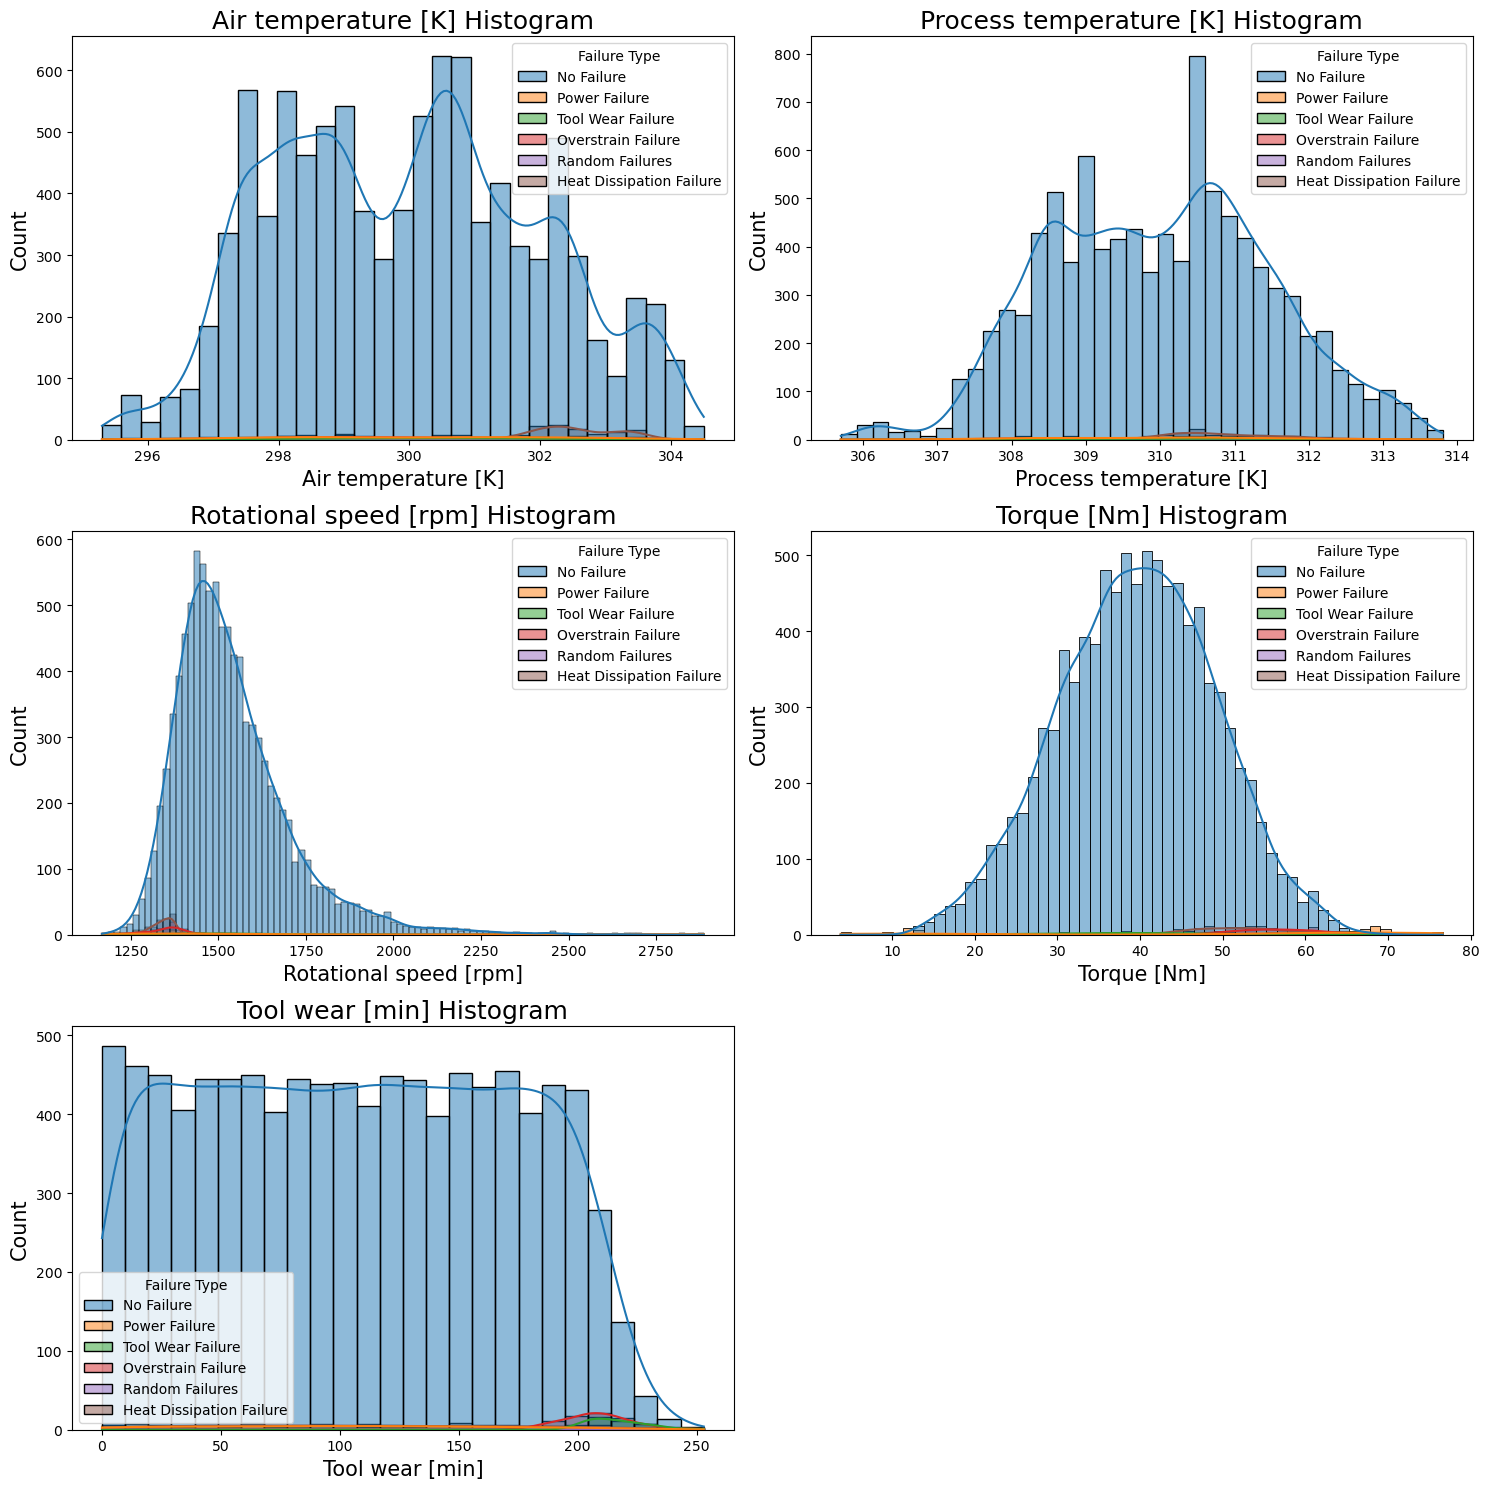

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

df_X = df.drop(['Target', 'Failure Type', 'UDI', 'Product ID', 'Type'], axis=1)

# Calculate the number of rows required for subplots
num_rows = (len(df_X.columns) + 1) // 2

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size based on the number of columns
plotnumber = 1

for column in df_X.columns:
    ax = plt.subplot(num_rows, 2, plotnumber)  # Adjust the subplot arrangement
    sns.histplot(x=df_X[column], hue=df['Failure Type'], ax=ax, kde=True)  # Combine histogram and KDE
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.title(f'{column} Histogram', fontsize=18)  # Add a title to each subplot
    plotnumber += 1

plt.tight_layout()
plt.show()


In [14]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

Type                       0.6000
Process temperature [K]    0.0317
Air temperature [K]        0.0279
Tool wear [min]            0.0120
Torque [Nm]                0.0052
dtype: float64

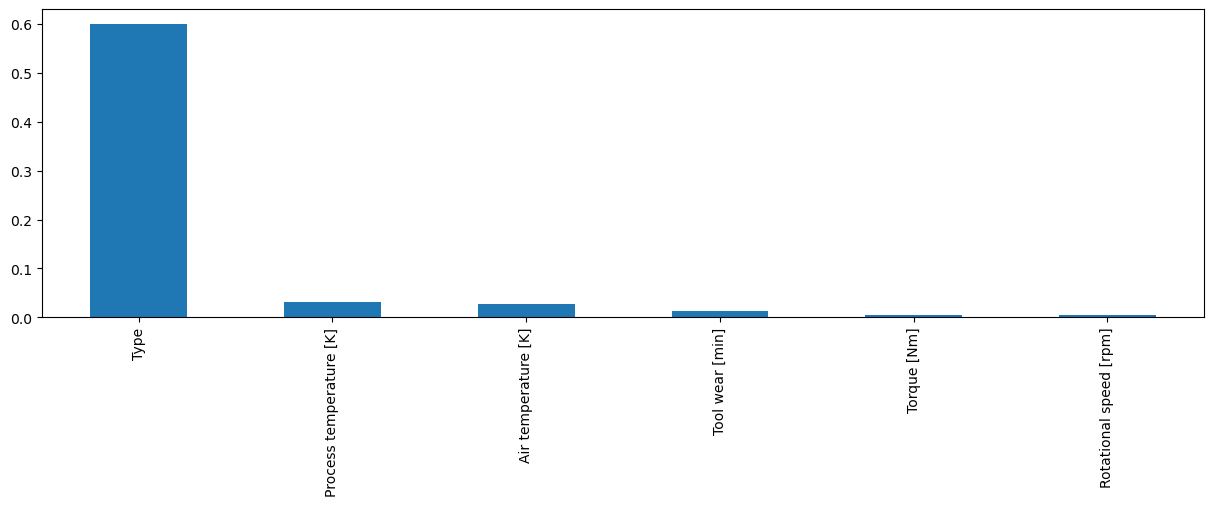

In [15]:
df1=df.drop(['UDI','Product ID','Target','Failure Type'],axis=1)
# Collects for each feature the most frequent entry
most_frequent_entry = df1.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df1.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


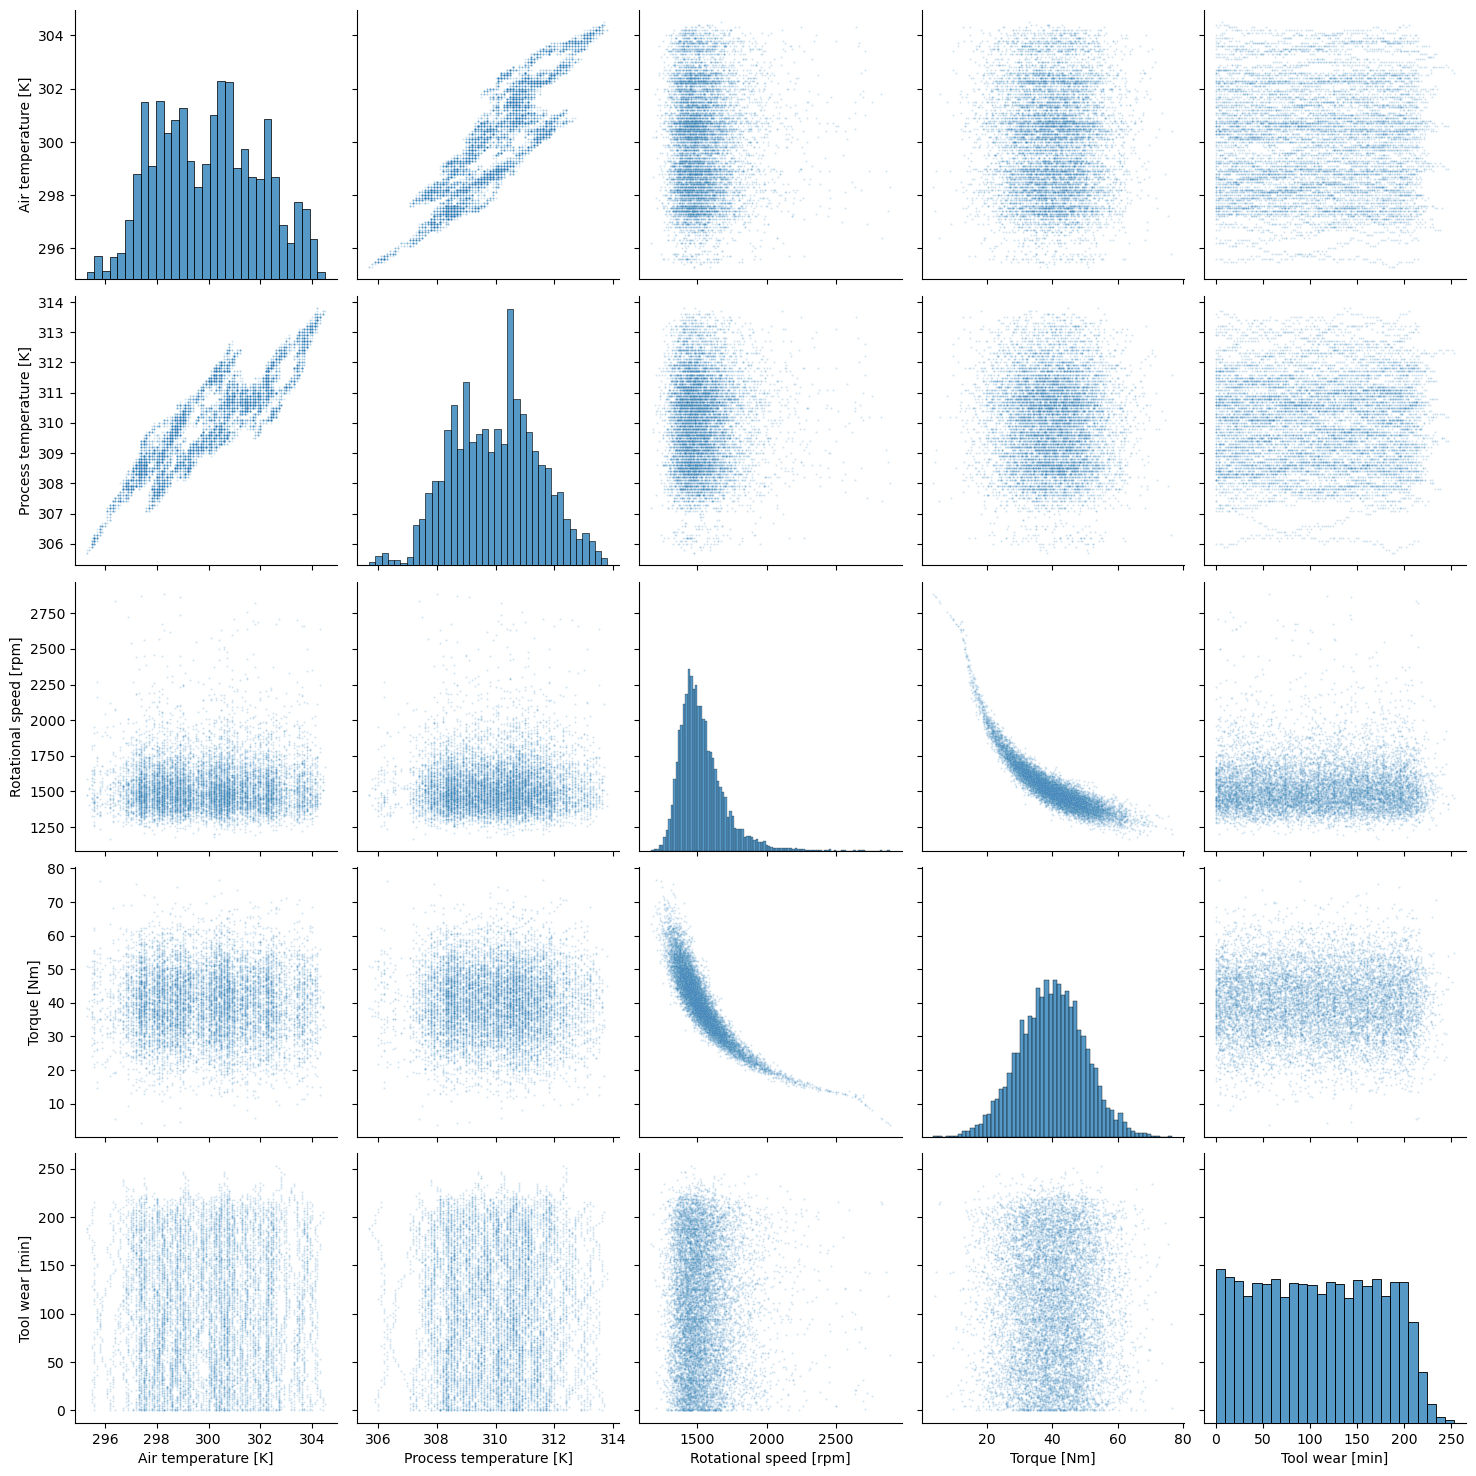

In [16]:
import seaborn as sns
sns.pairplot(df1, height=3, plot_kws={"s": 2, "alpha": 0.2});

In [17]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# # Plot density plots for both datasets
# sns.kdeplot(data=df1['Values'], fill=True, color='blue', label='Data 1', ax=axes[0])
# sns.kdeplot(data=df2['Values'], fill=True, color='green', label='Data 2', ax=axes[1])

# # Set titles and labels for the density plots
# axes[0].set_title('Density Plot - Data 1')
# axes[0].set_xlabel('Values')
# axes[0].set_ylabel('Density')
# axes[0].legend()

# axes[1].set_title('Density Plot - Data 2')
# axes[1].set_xlabel('Values')
# axes[1].set_ylabel('Density')
# axes[1].legend()

# # Show the density plots
# plt.tight_layout()
# plt.show()


In [18]:
import scipy.stats as stats
statistics_dict={}

# Calculate the skewness
for column in ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']:
    skewness=stats.skew(df[column])
    kurtosis = stats.kurtosis(df[column])
    statistics_dict[column] = {'skewness': skewness, 'kurtosis': kurtosis}



In [19]:
statistics_dict
statistics_df = pd.DataFrame(statistics_dict)

In [20]:
statistics_df

Air temperature [K]  Process temperature [K]  \
skewness             0.114257                 0.015025   
kurtosis            -0.836144                -0.500084   

          Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
skewness                1.992872    -0.009515         0.027288  
kurtosis                7.388649    -0.013834        -1.166754

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


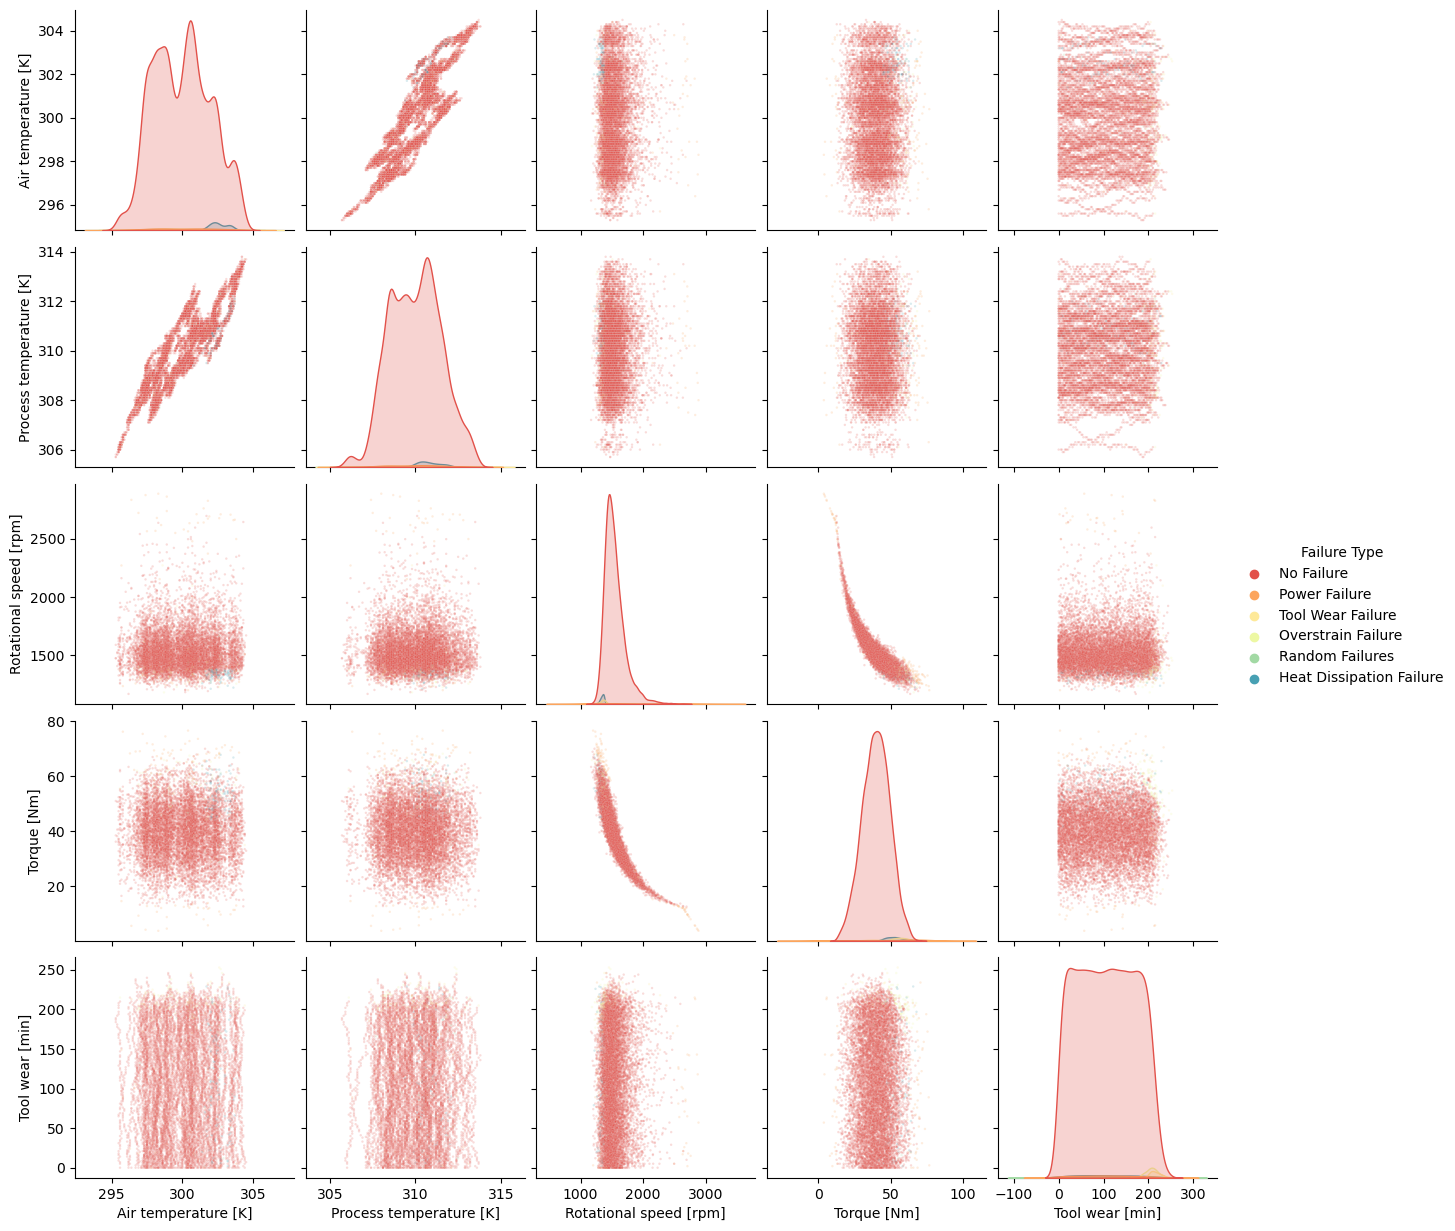

In [21]:
import seaborn as sns
sns.pairplot(
    df.drop(['UDI','Target'],axis=1), plot_kws={"s": 3, "alpha": 0.2}, hue="Failure Type", palette="Spectral" );

In [22]:
df[(df['Rotational speed [rpm]'] > 2250) & (df['Failure Type'] != 'No Failure')].shape[0]


31

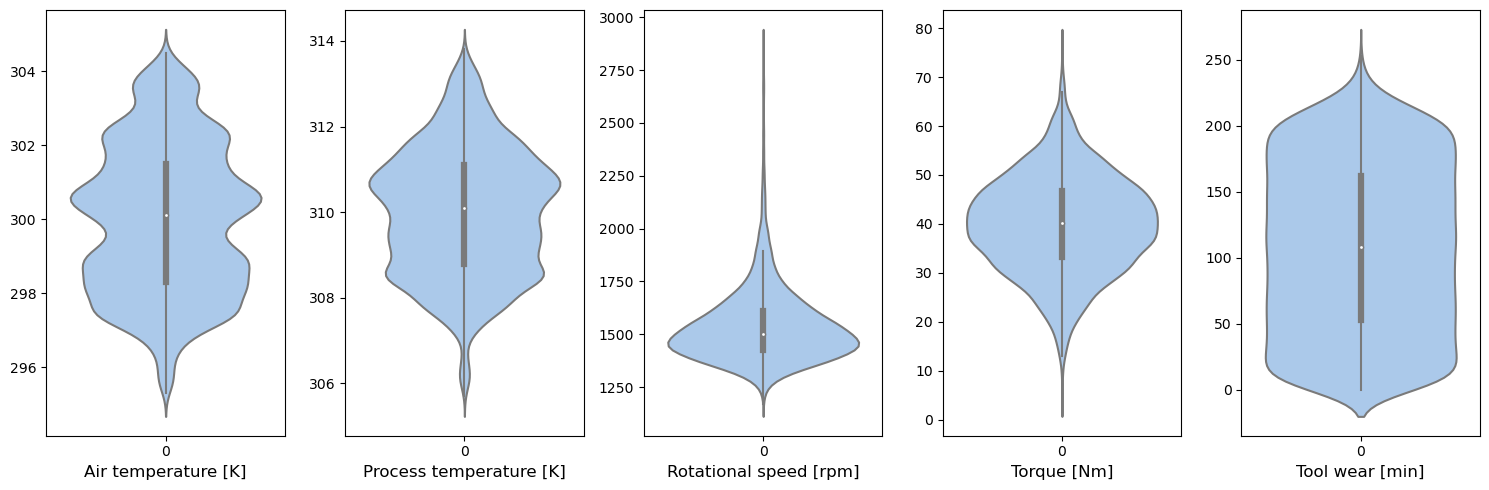

In [23]:
df11=df.drop(['UDI','Product ID','Type','Target','Failure Type'],axis=1)

fig, axes = plt.subplots(nrows=1, ncols=len(df11.columns), figsize=(15, 5))

# Plot violin plots for each column
for i, column in enumerate(df11.columns):
    sns.violinplot(data=df11[column], ax=axes[i], palette="pastel")
    axes[i].set_xlabel(column, fontsize=12)

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

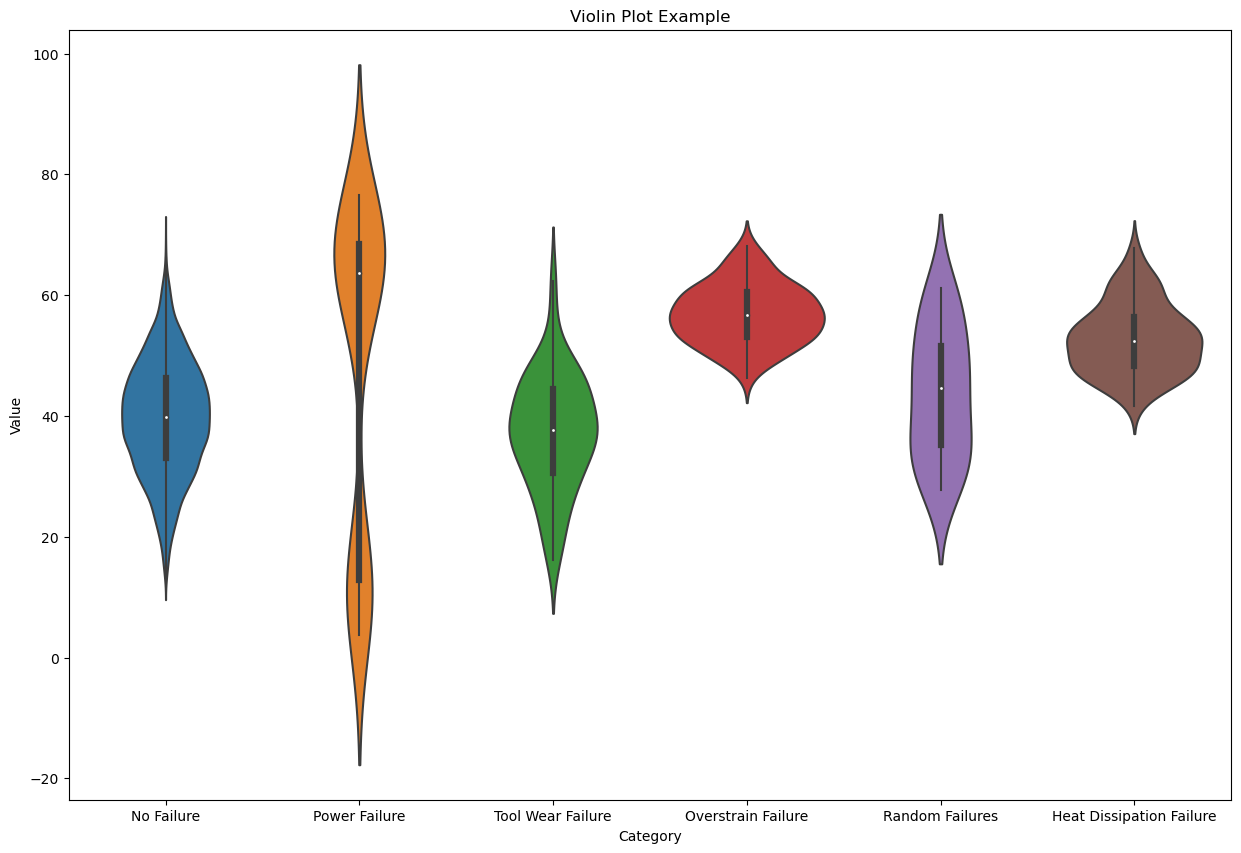

In [24]:

plt.figure(figsize=(15, 10))
# Create the violin plot
#sns.set(style="whitegrid")  # Optional: Set the plot style
sns.violinplot(x=df['Failure Type'], y='Torque [Nm]', data=df11)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Violin Plot Example')

# Show the plot
plt.show()

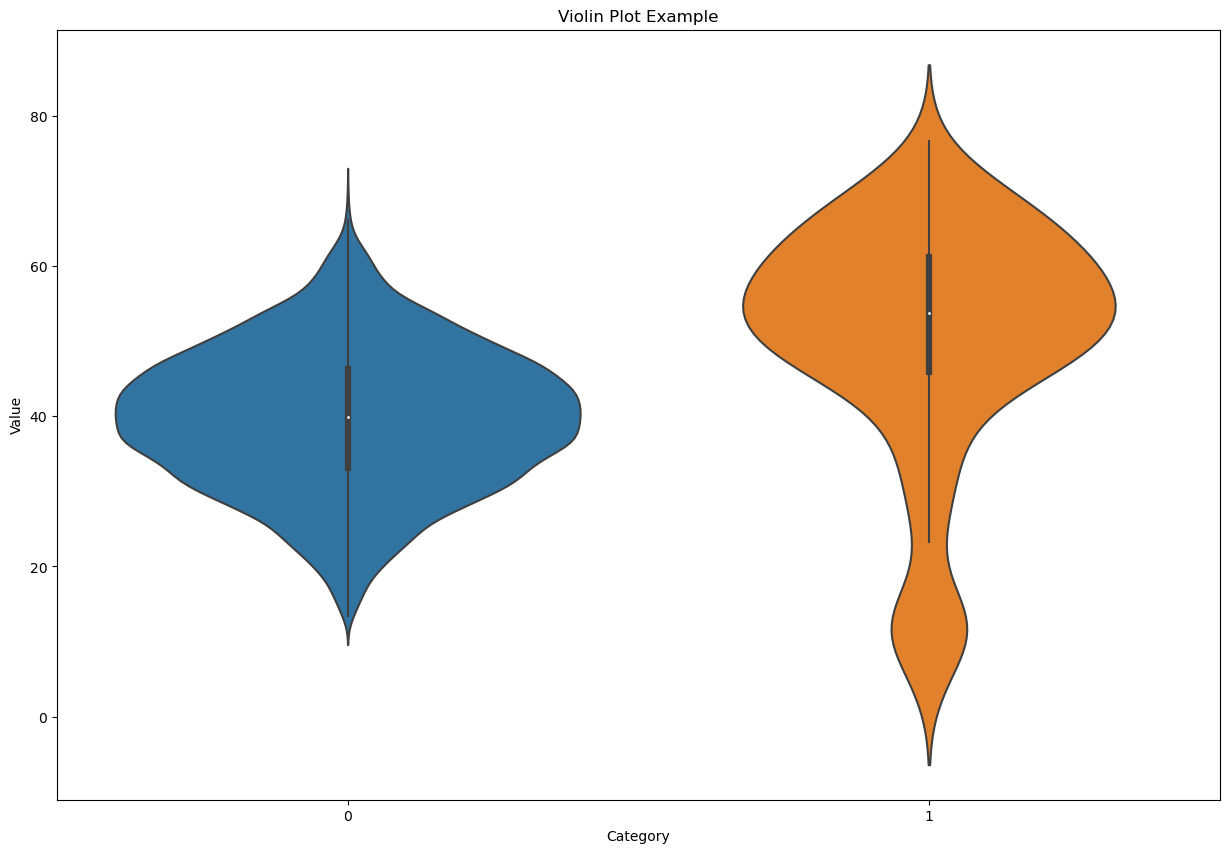

In [25]:

plt.figure(figsize=(15, 10))
# Create the violin plot
#sns.set(style="whitegrid")  # Optional: Set the plot style
sns.violinplot(x=df['Target'], y='Torque [Nm]', data=df11)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Violin Plot Example')

# Show the plot
plt.show()

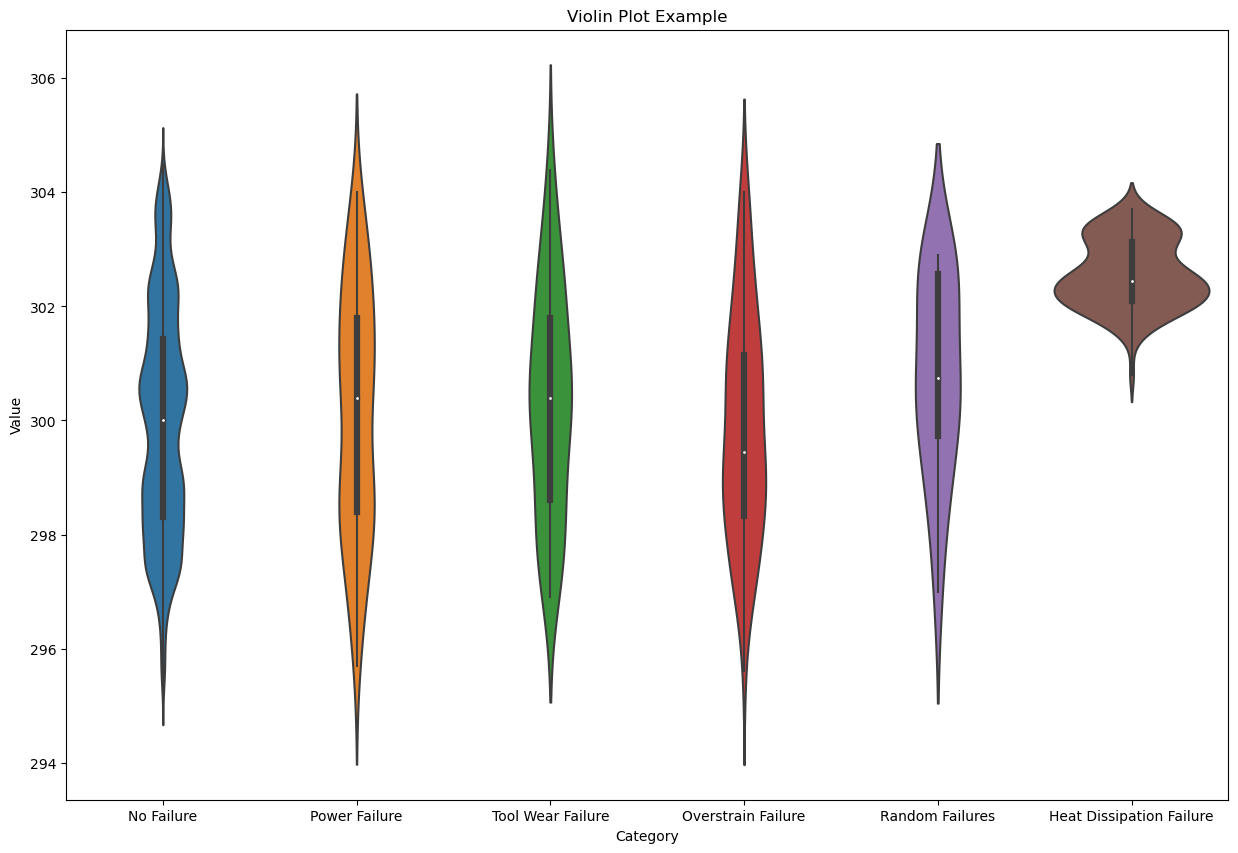

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
# Create the violin plot
#sns.set(style="whitegrid")  # Optional: Set the plot style
sns.violinplot(x=df['Failure Type'], y='Air temperature [K]', data=df11)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Violin Plot Example')

# Show the plot
plt.show()

## Data preprocessing

In [27]:

from sklearn.preprocessing import OrdinalEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])
df.head()

UDI  Product ID  Type  Air temperature [K]  Process temperature [K]  \
0    1      7003.0   2.0                298.1                    308.6   
1    2      1003.0   1.0                298.2                    308.7   
2    3      1004.0   1.0                298.1                    308.5   
3    4      1005.0   1.0                298.2                    308.6   
4    5      1006.0   1.0                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  Failure Type  
0                    1551         42.8                0       0           1.0  
1                    1408         46.3                3       0           1.0  
2                    1498         49.4                5       0           1.0  
3                    1433         39.5                7       0           1.0  
4                    1408         40.0                9       0           1.0

In [28]:
import plotly.express as px
from sklearn.decomposition import PCA

df_pca =  df.drop(['Target', 'UDI', 'Product ID', 'Type'], axis=1)

In [29]:
from sklearn.decomposition import PCA

# df = px.data.iris()
# X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=2)
components = pca.fit_transform(df_pca)

fig = px.scatter(components, x=0, y=1, color=df['Failure Type'])
fig.show()

In [30]:
import plotly.express as px
from sklearn.decomposition import PCA

# d

pca = PCA(n_components=3)
components = pca.fit_transform(df_pca)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df_pca['Failure Type'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
)
fig.show()


## RandomForestClassifier

In [31]:
from sklearn.model_selection import KFold
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
k = 3
accuracy_scores=[]
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    rf = RandomForestClassifier()
    param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
    rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)
    X_train, y_train = train_data.drop(['Target','Failure Type','UDI','Product ID'], axis=1), train_data['Failure Type']
    X_test, y_test = test_data.drop(['Target','Failure Type','UDI','Product ID'], axis=1), test_data['Failure Type']
    rand_search.fit(X_train, y_train)
    y_pred = rand_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.9690000793720643


In [33]:
rand_search.best_params_

{'max_depth': 3, 'n_estimators': 139}

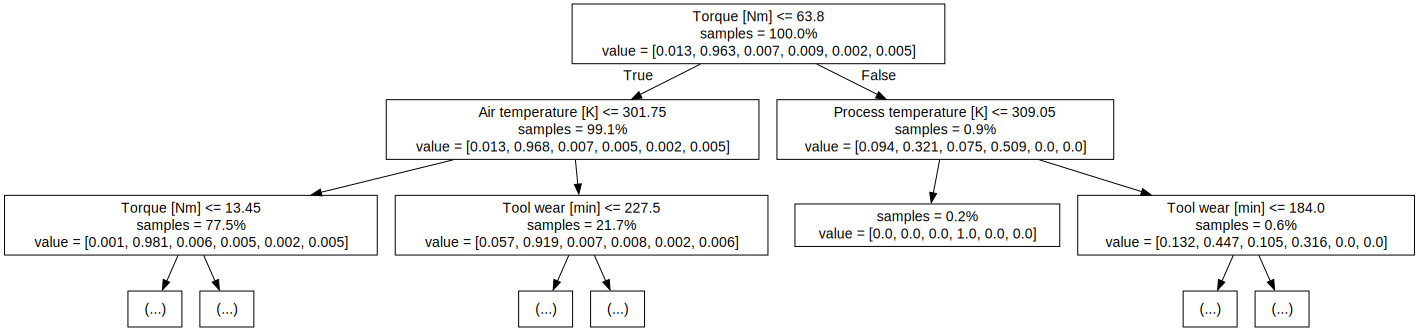

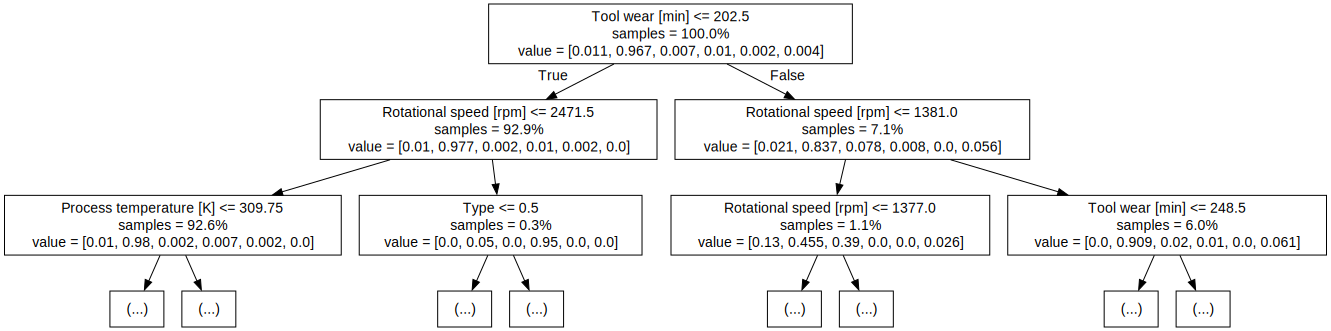

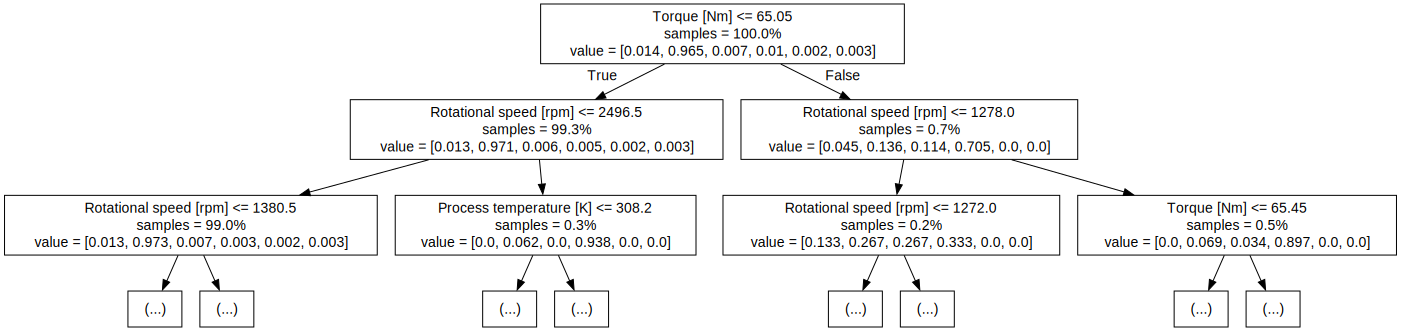

In [34]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree = rand_search.best_estimator_.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                              # filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    dot_data = dot_data.replace('fillcolor="green', 'fillcolor="red')
    dot_data = dot_data.replace('fontcolor="#', 'fontcolor="white')
    graph = graphviz.Source(dot_data)
    display(graph)

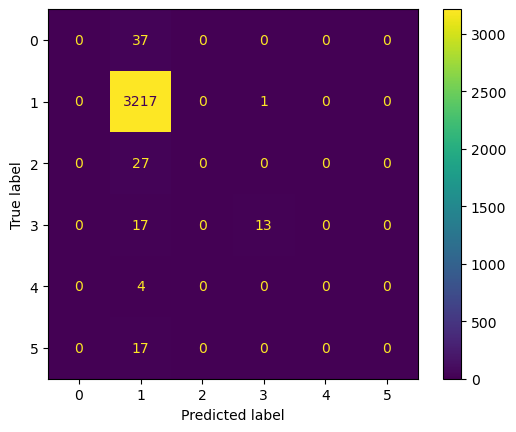

In [36]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
# Generate predictions with the best model
y_pred = rand_search.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Linear SVM

In [37]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

k = 7
accuracy_scores=[]
# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Iterate over each fold
for train_index, test_index in kf.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    X_train, y_train = train_data.drop(['Target','Failure Type','UDI','Product ID'], axis=1), train_data['Failure Type']
    X_test, y_test = test_data.drop(['Target','Failure Type','UDI','Product ID'], axis=1), test_data['Failure Type']
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
# The overall performance of the model
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.98069962764672


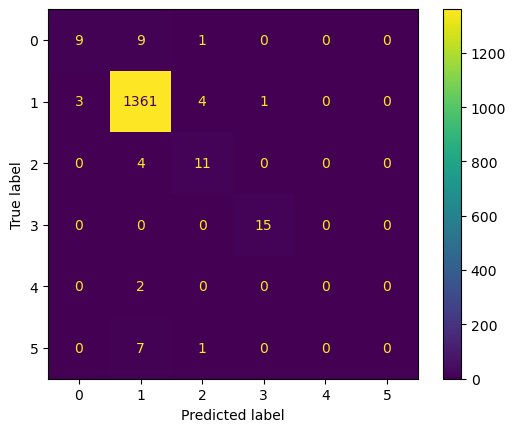

In [38]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## SVM with rbf kernel

In [40]:
from sklearn.model_selection import train_test_split
X = df.drop(['Target','Failure Type','UDI','Product ID'], axis=1)
y = df['Failure Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

svm = SVC(kernel='rbf')

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9685


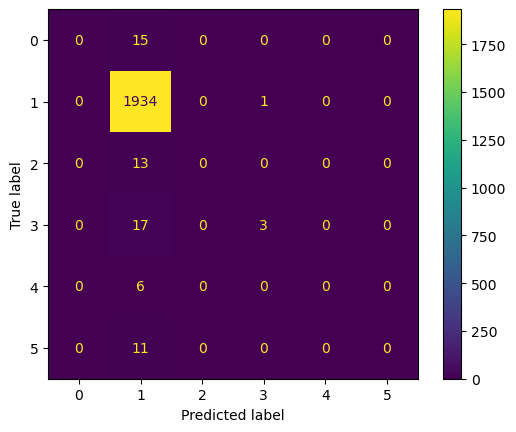

In [41]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## KNN

In [42]:
 from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3,5,7,8,9,10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

accuracy = best_knn.score(X_test, y_test)
print("Best parameters:", best_params)
print("Accuracy:", accuracy)


Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 0.97


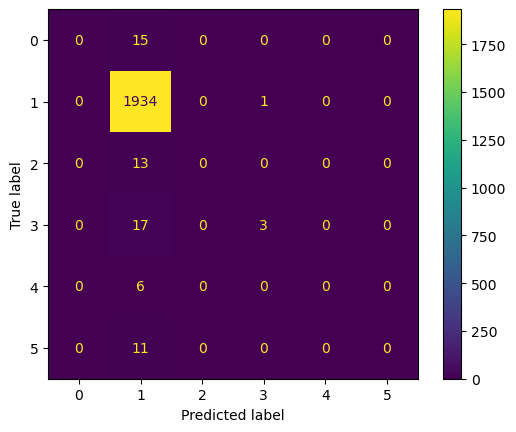

In [43]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Decision Tree

In [44]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.971


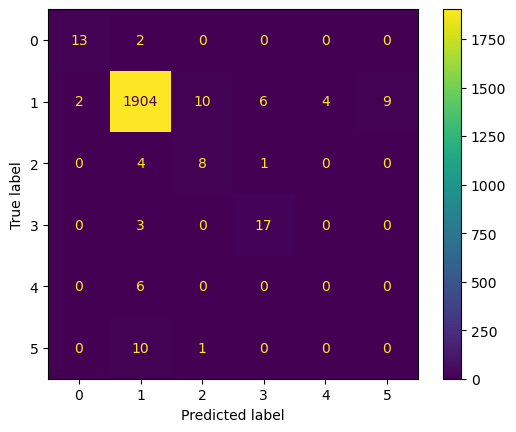

In [45]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [46]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=edd1d342ca39530edf75d3374fc2108881ed60fa483fa9d2fdea2f2c1b86b0eb
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


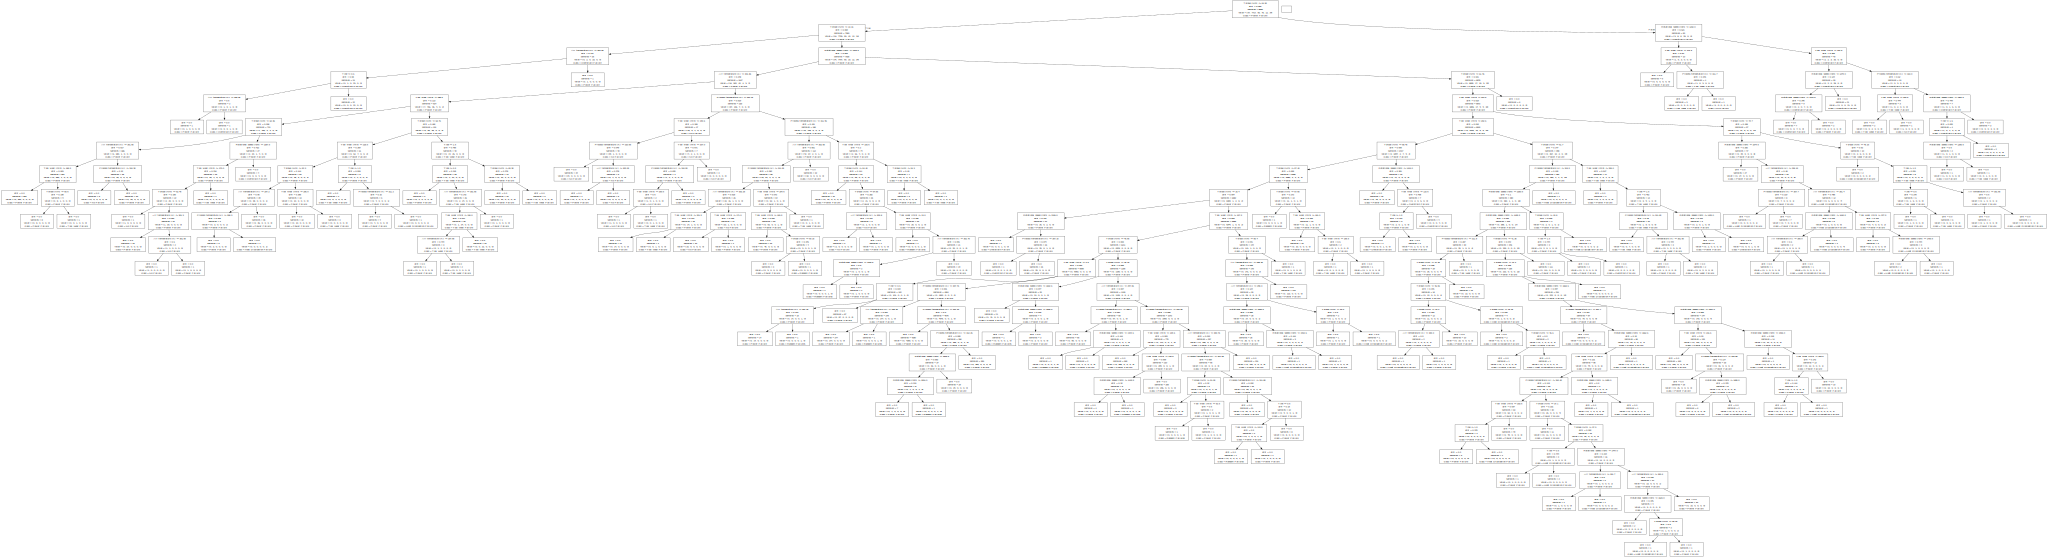

In [47]:
import pydotplus
from sklearn.tree import export_graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_train.columns,
                                class_names=['No Failure','Power Failure','Tool Wear Failure','Overstrain Failure','Random Failures','Heat Dissipation Failure'])
graph = pydotplus.graph_from_dot_data(dot_data)
graphviz.Source(graph.to_string())

## XGBClassifier

In [48]:
import pandas as pd
import xgboost as xgb

from sklearn.metrics import accuracy_score
import re

X = df.drop(['Target','Failure Type','UDI','Product ID'], axis=1)
y = df['Failure Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]


model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 98.50%


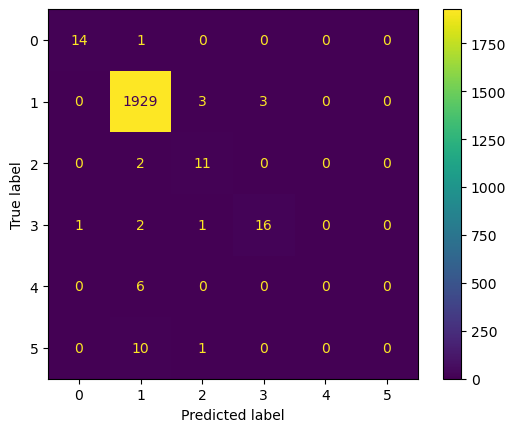

In [49]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Saving the model

In [ ]:
import pickle

# Save your model using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
    print(model) 